In [30]:
import pandas as pd
import numpy as np
import PIL
import os
import json
import cv2
import os
import numpy as np
from collections import Counter
import shutil
import sklearn
import sklearn.metrics as metrics
import pytesseract
from matplotlib.pyplot import imshow
%matplotlib inline


# load data
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
from IPython.display import Image

Stages of Optical Character Recognition


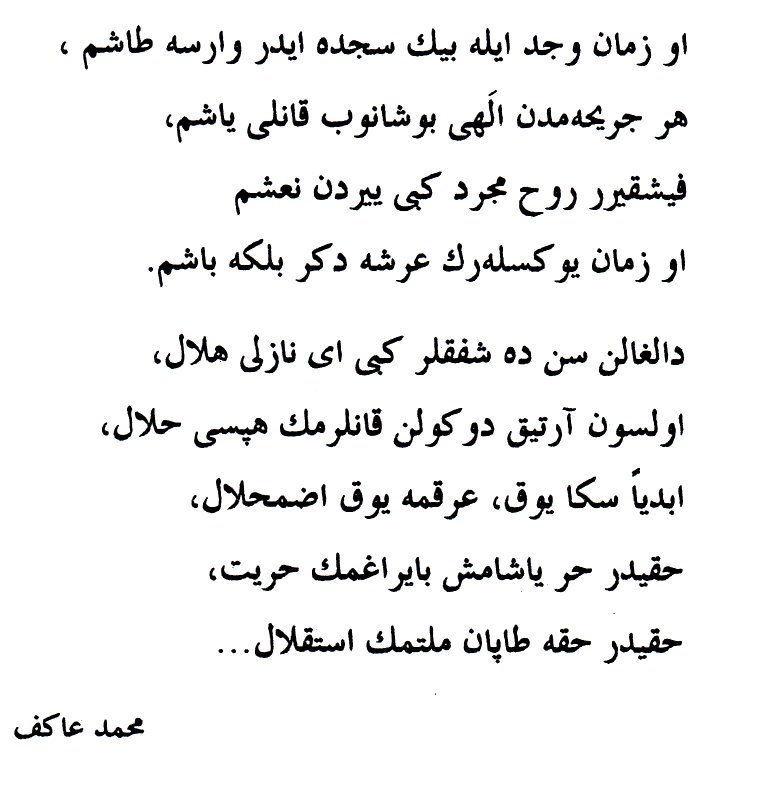

In [31]:
print("Stages of Optical Character Recognition")
Image(filename='/home/furkan/Desktop/Models/osmanlica5.jpg')

In [46]:
file =  r'/home/furkan/Desktop/Models/osmanlica5.jpg'
#file = r'output2/sample.jpg'
image2 = PIL.Image.open(file)
text = pytesseract.image_to_string(image2,'ara')
text=text.split()
print(text)
print(len(text[2]))

['او', 'زمان', 'وجد', 'ايله', 'بيك', 'سجذه', 'ايدر', 'وارسه', 'طاشم', '2', 'هر', 'جريحهمدن', 'الَهى', 'بوشانوب', 'قانلى', 'ياشمء', 'فيشقيرر', 'روح', 'مجرد', 'كى', 'ييردن', 'نعشم', 'دالغالن', 'سن', 'ده', 'شفقلر', 'كى', 'اى', 'نازلى', 'هلال»', 'اولسون', 'آرتيق', 'دوكولن', 'قانلرمك', 'هبسى', 'حلال»', 'ابدياً', 'سكا', 'يوق»', 'عرقمه', 'يوق', 'اضمحلال»', 'حقيدر', 'حر', 'ياشامش', 'بايراغمك', 'حريت,', 'حقيدر', 'حقه', 'طايان', 'ملتمك', 'استقلال...', 'محمد', 'عاكف']
3


In [47]:
letterCount = []

for i in range(len(text)):
    letterCount.append(len(text[i]))
    
len(letterCount)
len(text)

54

In [48]:
import keras
keras.__version__

'2.2.5'

In [49]:
from keras.models import load_model

model = load_model('/home/furkan/Desktop/Models/modelV3.h5')
model.summary()  # As a reminder.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [50]:
import os

path = '/home/furkan/Desktop/Models/letters5/'

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        files.append(os.path.join(r, file))

for f in files:
    print(f)

/home/furkan/Desktop/Models/letters5/l-211.jpg
/home/furkan/Desktop/Models/letters5/l-130.jpg
/home/furkan/Desktop/Models/letters5/l-151.jpg
/home/furkan/Desktop/Models/letters5/l-9.jpg
/home/furkan/Desktop/Models/letters5/l-217.jpg
/home/furkan/Desktop/Models/letters5/l-234.jpg
/home/furkan/Desktop/Models/letters5/l-148.jpg
/home/furkan/Desktop/Models/letters5/l-158.jpg
/home/furkan/Desktop/Models/letters5/l-125.jpg
/home/furkan/Desktop/Models/letters5/l-145.jpg
/home/furkan/Desktop/Models/letters5/l-25.jpg
/home/furkan/Desktop/Models/letters5/l-218.jpg
/home/furkan/Desktop/Models/letters5/l-116.jpg
/home/furkan/Desktop/Models/letters5/l-239.jpg
/home/furkan/Desktop/Models/letters5/l-112.jpg
/home/furkan/Desktop/Models/letters5/l-186.jpg
/home/furkan/Desktop/Models/letters5/l-194.jpg
/home/furkan/Desktop/Models/letters5/l-225.jpg
/home/furkan/Desktop/Models/letters5/l-215.jpg
/home/furkan/Desktop/Models/letters5/l-137.jpg
/home/furkan/Desktop/Models/letters5/l-7.jpg
/home/furkan/Deskt

In [51]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from keras.applications import VGG16
import os, shutil
import cv2

#dir3 = os.listdir('/home/furkan/Desktop/pngs/')
img_path = []

for f in files: 
    img = image.load_img(f, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    img_path.append(img)


# The local path to our target image
#img_path = '/home/furkan/Desktop/l-83.jpg'

# `img` is a PIL image of size 150x150
#img = image.load_img(img_path, target_size=(150, 150))

# `x` is a float32 Numpy array of shape (150, 150, 3)
#x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 150, 150, 3)
#x = np.expand_dims(x, axis=0)
#x /= 255

# Finally we preprocess the batch
# (this does channel-wise color normalization)
#x = preprocess_input(x)

In [52]:
img_path[0]

array([[[[-103.939    , -103.939    , -103.939    , ..., -103.939    ,
          -103.939    , -103.939    ],
         [-103.939    , -103.939    , -103.939    , ..., -103.939    ,
          -103.939    , -103.939    ],
         [-103.939    , -103.939    , -103.939    , ..., -103.939    ,
          -103.939    , -103.939    ],
         ...,
         [ -86.939    ,  -86.939    ,  -86.939    , ...,  140.061    ,
           140.061    ,  140.061    ],
         [ -86.939    ,  -86.939    ,  -86.939    , ...,  140.061    ,
           140.061    ,  140.061    ],
         [ -86.939    ,  -86.939    ,  -86.939    , ...,  140.061    ,
           140.061    ,  140.061    ]],

        [[-115.779    , -115.779    , -115.779    , ..., -110.779    ,
          -110.779    , -110.779    ],
         [-115.779    , -115.779    , -115.779    , ..., -110.779    ,
          -110.779    , -110.779    ],
         [-115.779    , -115.779    , -115.779    , ..., -110.779    ,
          -110.779    , -110.779 

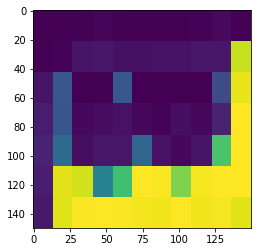

In [54]:
import matplotlib.pyplot as plt

plt.imshow(img_path[0][0][0])
plt.show()

In [55]:
len(img_path)

239

In [56]:
preds = model.predict_classes(img_path[3])
print('Predicted:', preds)

ValueError: Error when checking input: expected conv2d_1_input to have shape (150, 150, 3) but got array with shape (3, 150, 150)